In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def toSec(x):
    return x/1000
def toSecDf(df):
    df['SERVICE_TIME']       = df['SERVICE_TIME'].apply(toSec)
    df['AVG_DELAY_QUEUE']    = df['AVG_DELAY_QUEUE'].apply(toSec)
    df['AVG_INTERARRIVAL']   = df['AVG_INTERARRIVAL'].apply(toSec)
    df['INTER_ARRIVAL']   = df['INTER_ARRIVAL'].apply(toSec)
    df['SIMULATION_TIME']   = df['SIMULATION_TIME'].apply(toSec)
    df['SERVER_UTILIZATION'] = df['SERVER_UTILIZATION']*100
    return df
def basicPlot(df):
    fig, axs = plt.subplots(2,figsize=(10,12))
    dff =df[['SIMULATION_TIME','SERVER_UTILIZATION','AVG_INTERARRIVAL','SERVICE_TIME','TEST_ID','WORKERS']] 
    pdf = pd.pivot_table(dff,index=['WORKERS'])
    X = pdf[pdf.columns[1]]
    sns.barplot(x=X.index,y=X.values,ax=axs[0])
    axs[0].set_ylabel("SERVER UTILIZATION(%)")
    axs[0].set_xlabel("WORKERS")
    X = pdf[pdf.columns[0]]
    sns.barplot(x=X.index,y=X.values,ax=axs[1])
    axs[1].set_ylabel("AVG. INTERARRIVAL")
    axs[1].set_xlabel("WORKERS")
    plt.show()
def basic2Plot(df):
    rff =df[['AVG_DELAY_QUEUE','SIMULATION_TIME','SERVER_UTILIZATION','AVG_INTERARRIVAL','SERVICE_TIME','TEST_ID','WORKERS']] 
    rf = pd.pivot_table(rff,index=['WORKERS'])
    fig,ax = plt.subplots(1,figsize=(7,7))
    ax = rf['AVG_DELAY_QUEUE'].plot(kind='line',marker='o',color="red",ax=ax)
    ax.set_ylabel("AVG. DELAY IN QUEUE")

In [75]:
df = pd.read_csv('../results/data_01.csv')
df = toSecDf(df)
df.drop(['STD','MEAN','READ_RATIO','SIZE','SAS_SIZE','CONCURRENCY'], axis=1, inplace=True)

In [138]:
round_robin = df.loc[df['LOAD_BALANCER']=='ROUND-ROBIN']
random      = df.loc[df['LOAD_BALANCER']=='RANDOM']
two_choices = df.loc[df['LOAD_BALANCER']=='TWO-CHOICES']
# round_robin['NUM_REQUESTS'].shape
ys=random[random['TEST_ID']==4]['NUM_REQUESTS'].to_numpy()
# ys=two_choices[two_choices['TEST_ID']==4]['NUM_REQUESTS'].to_numpy()
xs =round_robin[round_robin['TEST_ID']==4]['NUM_REQUESTS'].to_numpy()
x=(np.sqrt((xs-ys)**2 )/1000).sum()*100 
str(x) + "%"
# xs-ys

'6.200000000000001%'

# ROUND ROBIN
Grafica #1: Se observa como la utilizacion del servidor disminuye cuando se añaden mas "bins"

Grafica #2: Se observa como el tiempo medio entre las peticiones aumenta cuando se añaden mas "bins"

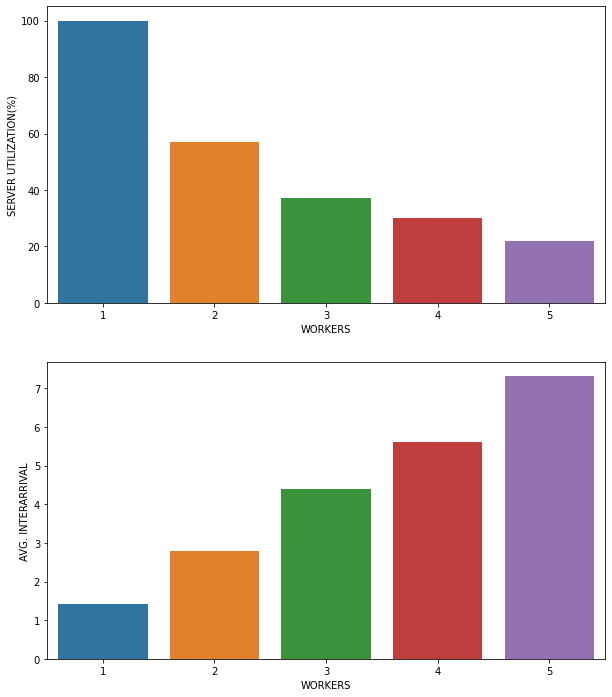

In [77]:
basicPlot(round_robin)

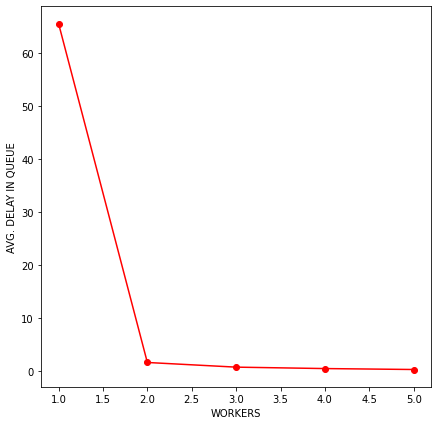

In [56]:
basic2Plot(round_robin)

# RANDOM

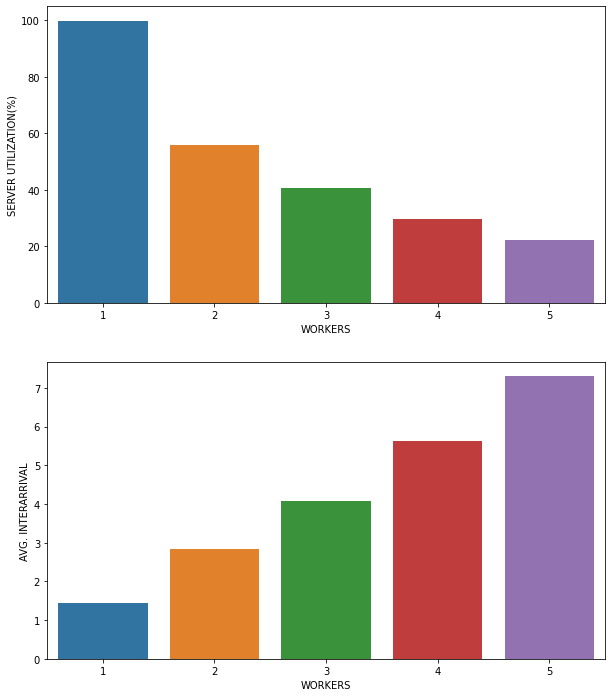

In [78]:
basicPlot(random)

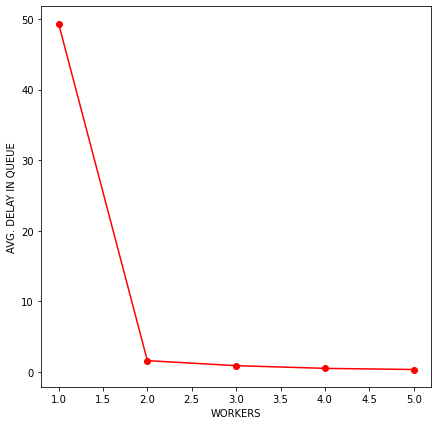

In [58]:
basic2Plot(random)

# TWO CHOICES

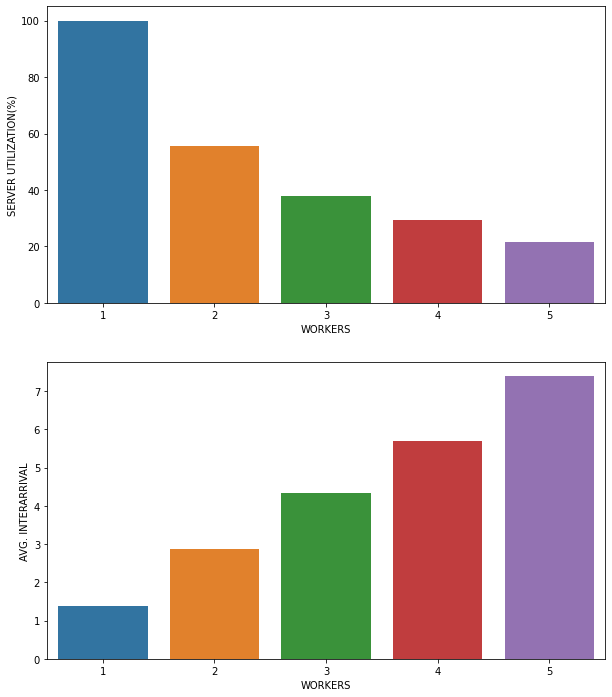

In [79]:
basicPlot(two_choices)

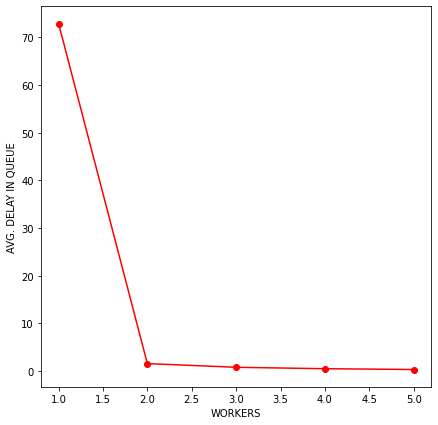

In [59]:
basic2Plot(two_choices)

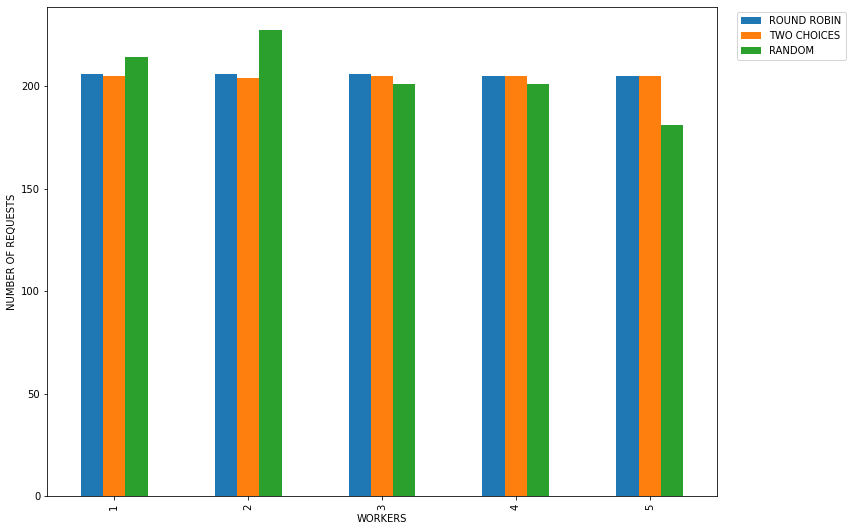

In [87]:
def plott(*args,**kwargs):
    NR =kwargs.get('y','NUM_REQUESTS')
    I =kwargs.get('bins',4)
    RR = round_robin[round_robin['TEST_ID']==I][NR].to_numpy()
    R  = random[random['TEST_ID']==I][NR].to_numpy()
    TC =two_choices[two_choices['TEST_ID']==I][NR].to_numpy()
    test = pd.DataFrame({'ROUND ROBIN':RR,'TWO CHOICES':TC,'RANDOM':R})
    test.index=(range(1,I+2))
    fig,ax = plt.subplots(1,figsize=(12,9))
    xLabel = kwargs.get('xLabel','WORKERS')
    yLabel = kwargs.get('yLabel','NUMBER OF REQUESTS')
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    test.plot(kind='bar',ax=ax)
    ax.legend(loc="upper right",bbox_to_anchor=(1.2, 1))

plott(bins=4)